# Logistic Map

The logistic map is defined by
$$x_{n+1} = rx_n(1-x_n)$$

In [1]:
def logistic(r,x):
    return r*x*(1-x)

The logistic map is a non-linear recursive map

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
from matplotlib import pyplot as plt

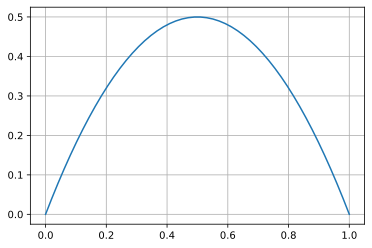

In [3]:
def plotLogistic():
    x = np.linspace(0,1)
    plt.plot(x,logistic(2,x))
    plt.grid()
plotLogistic()

We take an initial noise value of $10^{-5}$ for x and recursively apply the logistic map for different values of the control parameter $r$

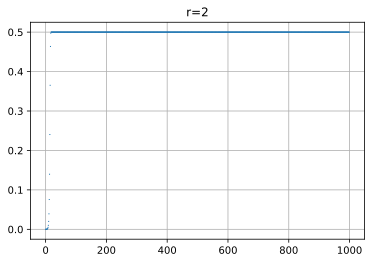

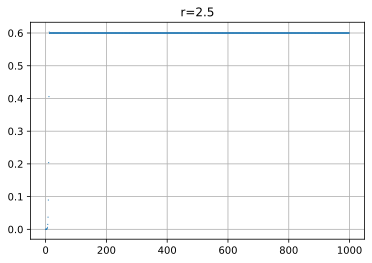

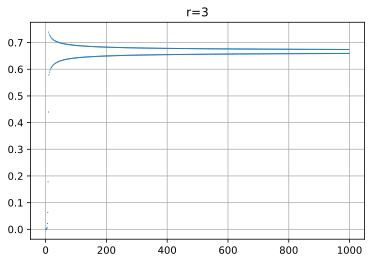

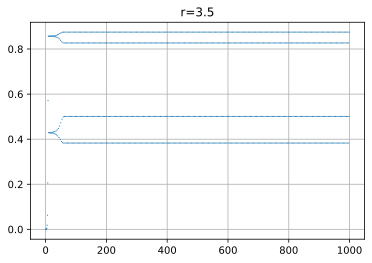

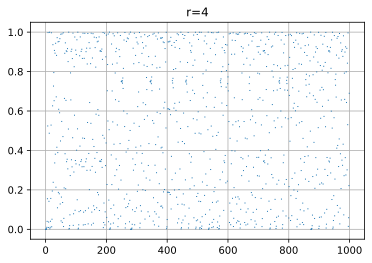

In [4]:
def plotLogisticSeries(r):
    x = 1e-5
    values = []
    for i in range(1000):
        values.append(logistic(r,x))
        x = logistic(r,x)
    plt.figure()
    plt.plot(values,',')
    plt.title('r='+str(r))
    plt.grid()
params = [2,2.5,3,3.5,4]
for r in params:
    plotLogisticSeries(r)

As the plots above show, the series $\{x_n\}$ gets more chaotic as the value of the control parameter increases. In other words there are bifurcations occuring as $r$ increases

In [6]:
n = 1000
r = np.linspace(2,4,n)

def genBifurcation(iterations):
    x = 0.5*np.ones(n)
    results = np.ones((iterations,n))
    for i in range(iterations):
        x = logistic(r, x)
        results[i] = x
    return results

results = genBifurcation(10000)

In [14]:
last = 100
for i in range(last):
    plt.plot(r,results[-i-1],',k')

The Feigenbaum number is the limiting ratio of each bifurcation interval to the next between every period doubling
$$\delta = \lim_{n\rightarrow\infty} \frac{r_{n-1} - r_{n-2}}{r_n - r_{n-1}}$$
Where, $r_n$ is the control parameter at the $n^{th}$ period doubling